In [1]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis, PCA

import numpy as np
import matplotlib.pyplot as plt

%pylab inline

In [27]:
data = pd.read_csv('Final Psyc 100 2018 Summer (Responses) - Copy of Student Submissions.csv')

data = pd.get_dummies(data)

In [28]:
pca = PCA(n_components=16).fit(data)

In [29]:
pca.explained_variance_ratio_.sum()

0.9938473139751755

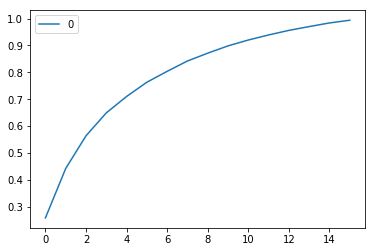

In [30]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).plot()

In [44]:
fa = FactorAnalysis(n_components=15).fit(data)

In [45]:
factors = pd.DataFrame(fa.components_, columns=data.columns).T

In [13]:
factors['absol'] = abs(factors[0])
# factors.sort_values('absol', ascending=False)

In [46]:
m = fa.components_
n = fa.noise_variance_

In [35]:
m1 = m**2

m2 = np.sum(m1,axis=1)

In [39]:
pvar1 = (m2[0])/np.sum(m2)

pvar1

0.2533414513992655

In [40]:
pvar2 = (m2[1])/np.sum(m2)

pvar2

0.17798312194543406

In [41]:
pvar1_with_noise = (m2[0])/(np.sum(m2)+np.sum(n))

pvar1_with_noise

0.24651785638646231

In [52]:
explained = []

for i in range(len(m)):
    print(i+1, (m2[i])/(np.sum(m2)+np.sum(n)))
    explained.append((m2[i])/(np.sum(m2)+np.sum(n)))
    
explained = np.array(explained)

1 0.24651785638646231
2 0.1731892568413932
3 0.09160820095076865
4 0.0976903642847489
5 0.06732908912754429
6 0.05012231471219763
7 0.039350399926434125
8 0.031060983724107663
9 0.026365423289383447
10 0.0289182673920406
11 0.02136808321788105
12 0.01833635838903625
13 0.016221420813662627
14 0.039054186377239376
15 0.02593341420764882


In [54]:
np.cumsum(explained)

array([0.24651786, 0.41970711, 0.51131531, 0.60900568, 0.67633477,
       0.72645708, 0.76580748, 0.79686847, 0.82323389, 0.85215216,
       0.87352024, 0.8918566 , 0.90807802, 0.94713221, 0.97306562])

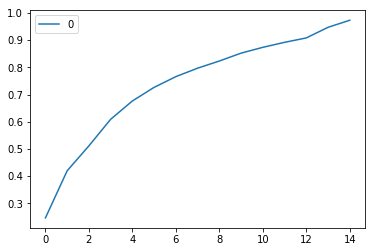

In [55]:
pd.DataFrame(np.cumsum(explained)).plot()